In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/hades/projects/msci-wiki/plots':
  os.chdir(r'/hades/projects/msci-wiki/plots')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.11/importlib/_bootstrap.py": 1693664193.0, "/usr/lib/python3.11/importlib/_bootstrap_external.py": 1693664193.0, "/usr/lib/python3.11/zipimport.py": 1693664193.0, "/usr/lib/python3.11/codecs.py": 1693664193.0, "/usr/lib/python3.11/encodings/aliases.py": 1693664193.0, "/usr/lib/python3.11/encodings/__init__.py": 1693664193.0, "/usr/lib/python3.11/encodings/utf_8.py": 1693664193.0, "/usr/lib/python3.11/abc.py": 1693664193.0, "/usr/lib/python3.11/io.py": 1693664193.0, "/usr/lib/python3.11/stat.py": 1693664193.0, "/usr/lib/python3.11/_collections_abc.py": 1693664193.0, "/usr/lib/python3.11/genericpath.py": 1693664193.0, "/usr/lib/python3.11/posixpath.py": 1693664193.0, "/usr/lib/python3.11/os.py": 1693664193.0, "/usr/lib/python3.11/_sitebuiltins.py": 1693664193.0, "/usr/lib/python3.11/types.py": 1693664193.0, "/usr/lib/python3.11/warnings.py": 1693664193.0, "/usr/lib/python3.11/importlib/__init__.py": 1693664193.0, "/usr/lib/python3.11/importlib/_abc.py": 1693664193.0, "

/tmp/ipykernel_1992/2352873013.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


/tmp/ipykernel_1992/1039025301.py:87: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  axi1.set_axes_locator(InsetPosition(ax1, [1.1, -0.65, 1.5, 1.5]))
/tmp/ipykernel_1992/1039025301.py:91: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  axi3.set_axes_locator(InsetPosition(ax3, [1.1, 0.15, 1.5, 1.5]))


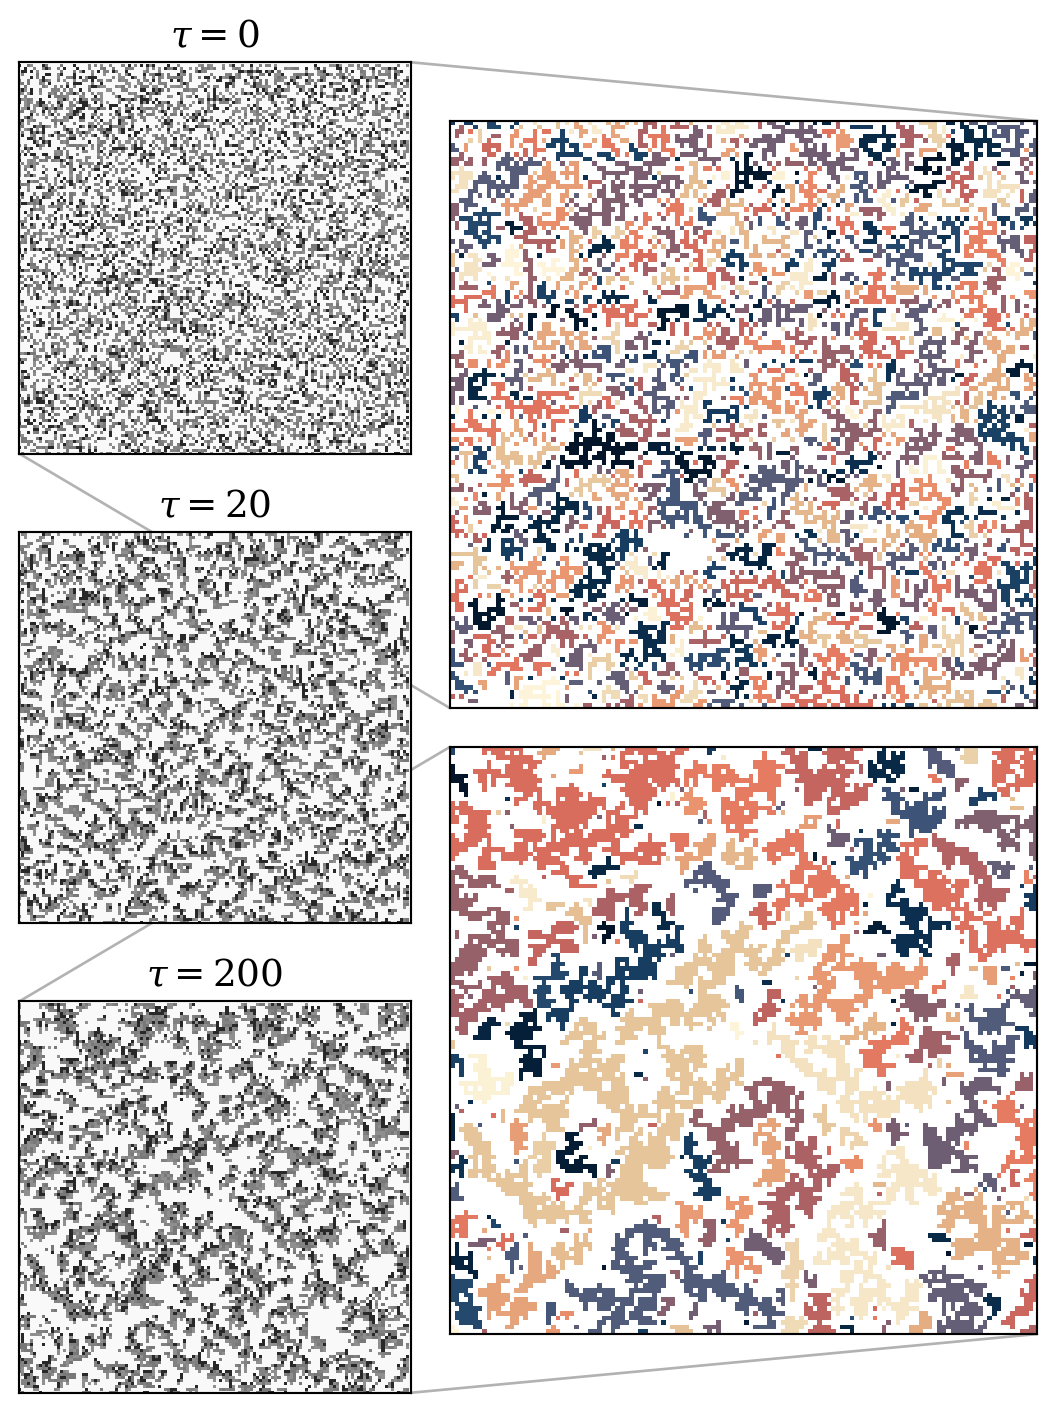

In [2]:
import os
os.chdir("/hades/projects/persistent-exclusion-process/src")

from plot_utils import get_plot_configs

import cmcrameri
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, inset_axes

import lattice

plot_configs = get_plot_configs()
plot_configs["xtick.labelsize"] = 12
plot_configs["ytick.labelsize"] = 12
plt.rcParams.update(plot_configs)

def plot_img(ax, img, tau):
    ax.set_xlim(0, n_x)
    ax.set_ylim(0, n_y)
    ax.set_aspect("equal", "box")
    ax.tick_params(
        axis = "both",
        which = "both",
        length = 0,
        labelleft = False,
        labelbottom = False,
    )
    ax.matshow(img, cmap=plt.get_cmap(name="cmc.grayCS", lut=5))
    ax.set_title(r"$\tau = {}$".format(tau))
    return ax

def plot_lb(img, ax):
    cmap=plt.get_cmap("cmc.lipariS")
    cl = cmap.__dict__['colors']
    new_cls = np.concatenate((cl,cl[1:],cl[1:],cl[1:]))
    cmap.__dict__["colors"] = new_cls
    cmap.__dict__["colors"][0] = np.array([1,1,1])
    cmap.__dict__["N"] = len(new_cls)
    kernel = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
    lb, _ = ndimage.label(img, structure=kernel)
    ax.tick_params(
        axis = "both",
        which = "both",
        length = 0,
        labelleft = False,
        labelbottom = False,
    )
    ax.matshow(np.flipud(lb), cmap=cmap)
    return ax

n_x = n_y = 128
n_p = int(0.45 * n_x * n_y)
tumble = 0.023
speed = 1
lat = lattice.Lattice(n_x * n_y, n_p)
lat.set_square_connectivity(n_x, n_y)
lat.reset_random_occupancy()
lat.reset_orientations()
plt.rcParams["figure.autolayout"] = False

fig, (ax1, ax2, ax3) = plt.subplots(
    3,
    1,
    figsize=(4, 9),
)

for idx in range(201):
    if idx == 0:
        ima = lat.image()
        ax1 = plot_img(ax1, ima, idx)
    if idx == 20:
        ax2 = plot_img(ax2, lat.image(), idx)
    if idx == 200:
        imb = lat.image()
        ax3 = plot_img(ax3, imb, idx)
        break
    lat.c_move(tumble, speed)

kernel = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
lba, _ = ndimage.label(ima, structure=kernel)
lbb, _ = ndimage.label(imb, structure=kernel)

axi1 = inset_axes(ax1, width="100%", height="100%", borderpad=1)
axi1.set_axes_locator(InsetPosition(ax1, [1.1, -0.65, 1.5, 1.5]))
axi1 = plot_lb(ima, axi1)

axi3 = inset_axes(ax3, width="100%", height="100%", borderpad=1)
axi3.set_axes_locator(InsetPosition(ax3, [1.1, 0.15, 1.5, 1.5]))
axi3 = plot_lb(imb, axi3)

kwg = {"alpha":.3, "zorder":0, "color": "k"}

fig.add_artist(
    ConnectionPatch(
        xyA=(0, 0),
        coordsA=ax1.transAxes,
        xyB=(0, 0),
        coordsB=axi1.transAxes,
        **kwg
    )
)
fig.add_artist(
    ConnectionPatch(
        xyA=(1, 1),
        coordsA=ax1.transAxes,
        xyB=(1, 1),
        coordsB=axi1.transAxes,
        **kwg
    )
)
fig.add_artist(
    ConnectionPatch(
        xyA=(1, 0),
        coordsA=ax3.transAxes,
        xyB=(1, 0),
        coordsB=axi3.transAxes,
        **kwg
    )
)
fig.add_artist(
    ConnectionPatch(
        xyA=(0, 1),
        coordsA=ax3.transAxes,
        xyB=(0, 1),
        coordsB=axi3.transAxes,
        **kwg
    )
)
fig.savefig("../plots/evo.pdf", bbox_inches='tight')